# MULTI-ARMED BANDIT EXAMPLE

The objective is to **maximize the expected total reward** over some time period, for example, over 1000 action selections, or time steps. In the *k*-armed bandit problem, each of the *k* actions has an expected or mean reward given that the action is selected, also called **value of the action**.

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

## Stationary problem

First, we start by considering a **stationary problem**. In this problem, we instantiate ***n*** armed bandits where the **true value q*(a)** of the ten actions was selected according to a normal distribution with mean zero and unit variance, and then the **actual rewards** were selected according to a mean **q*(a)**, unit-variance normal distribution.

In [2]:
# PARAMETERS
n = 10
timesteps = 1000
runs = 100
epsilons = [0.0, 0.01, 0.1]

For any learning method (any **epsilon**), we can measure its performance and behavior as it improves with experience over **1000 time steps** when applied to one of the bandit problems. This makes up one run. Repeating this for **100 independent runs**, each with a different bandit problem, we obtained measures of the learning algorithm’s average behavior.

In this case we used the **Sample-average** technique for **Action-value** estimates.

In [3]:
# Average reward
mean_reward_SA = np.zeros(shape=(len(epsilons), timesteps))

# Average percentage of optimal actions
mean_optimal_pct_SA = np.zeros(shape=(len(epsilons), timesteps))

for run in range(runs):
    
    # Rating of each restaurant
    restaurant_mean = random.normal(0, 1, size=n)
    
    for i, epsilon in enumerate(epsilons):
        
        # Initialize expectations
        cumulative_rewards = np.zeros(shape=(n,))                               
        cumulative_steps = np.zeros(shape=(n,))
        expectations = np.zeros(shape=(n,))
        
        # Initialize episode scores
        episode_reward = np.zeros(shape=(timesteps,))
        episode_optimal_pct = np.zeros(shape=(timesteps,))
        
        optimal_actions = 0
        
        for timestep in range(1, timesteps+1):
            
            if random.rand() < epsilon:
                # Exploration
                action = random.randint(n)
            else:
                # Exploitation
                action = np.argmax(expectations)
            
            # Sample the actual reward
            reward = random.normal(restaurant_mean[action], 1)
            
            # Update optimal action count
            if action in np.argwhere(restaurant_mean == np.max(restaurant_mean)):
                optimal_actions += 1
            
            # Update expectations for the current action
            cumulative_rewards[action] += reward
            cumulative_steps[action] += 1
            expectations[action] = cumulative_rewards[action] / cumulative_steps[action]
            
            # Save episode scores
            episode_reward[timestep-1] = np.sum(cumulative_rewards) / timestep
            episode_optimal_pct[timestep-1] = optimal_actions / timestep
            
        mean_reward_SA[i] += episode_reward
        mean_optimal_pct_SA[i] += episode_optimal_pct

# Average score evaluation
mean_reward_SA /= runs
mean_optimal_pct_SA /= runs

In [4]:
for i, epsilon in enumerate(epsilons):
    print(f'Total Satisfaction with ε = {epsilon} is {round(mean_reward_SA[i][-1], 2)}')

Total Satisfaction with ε = 0.0 is 1.03
Total Satisfaction with ε = 0.01 is 1.17
Total Satisfaction with ε = 0.1 is 1.25


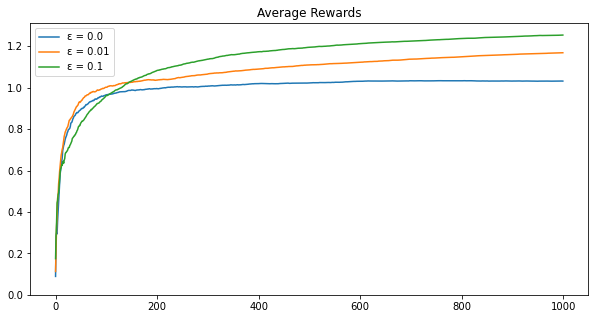

In [5]:
plt.figure(figsize=(10,5))
for i, epsilon in enumerate(epsilons):
    plt.plot(range(timesteps), mean_reward_SA[i], label=f'ε = {epsilon}')
    
plt.legend()
plt.title('Average Rewards')
plt.ylim([0, None])
plt.show()

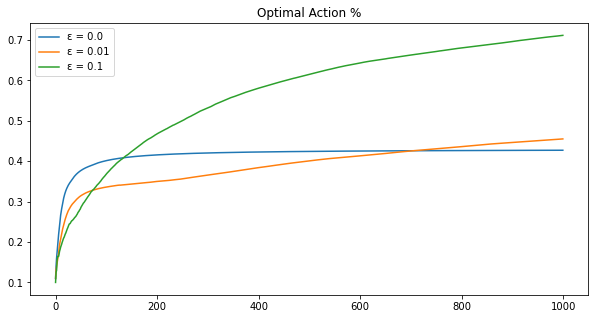

In [6]:
plt.figure(figsize=(10,5))
for i, epsilon in enumerate(epsilons):
    plt.plot(range(timesteps), mean_optimal_pct_SA[i], label=f'ε = {epsilon}')

plt.legend()
plt.title('Optimal Action %')
plt.show()

## Non-stationary problem

In **non-stationary problems**, where reward probabilities change over time, it makes sense to give more weight to recent rewards than to long-past rewards. This can be done by considering a **Constant step-size update**.

In [7]:
# PARAMETERS
n = 10
timesteps = 10000
runs = 20
alpha = 0.1
epsilons = [0.0, 0.01, 0.1]

As we have done previously, we measure the performance and behavior emerging from the application of different **epsilon** values. But now we use **10000 time steps** since we want to appreciate the variation of performance while the **true values** follow their random walk. This time we repeate the procedure for **20 independent runs**, each with a different bandit problem.

In this case we used the **Constant step-size update** technique for **Action-value** estimates.

In [8]:
# Average reward
mean_reward_CSS = np.zeros(shape=(len(epsilons), timesteps))

# Average percentage of optimal actions
mean_optimal_pct_CSS = np.zeros(shape=(len(epsilons), timesteps))

for run in range(runs):
    
    # Rating of each restaurant
    restaurant_mean = random.normal(0, 1, size=n)
    
    for i, epsilon in enumerate(epsilons):
        
        # Initialize expectations
        expectations = np.zeros(shape=(n,))
        
        # Initialize episode scores
        episode_reward = np.zeros(shape=(timesteps,))
        episode_optimal_pct = np.zeros(shape=(timesteps,))
        
        total_reward = 0
        optimal_actions = 0
        
        for timestep in range(1, timesteps+1):
            
            # Random-walk of true values
            restaurant_mean += random.normal(0, 0.01, size=n)
            
            if random.rand() < epsilon:
                # Exploration
                action = random.randint(n)
            else:
                # Exploitation
                action = np.argmax(expectations)
                
            reward = random.normal(restaurant_mean[action], 1)
            
            # Update total reward and optimal action count
            total_reward += reward
            
            if action in np.argwhere(restaurant_mean == np.max(restaurant_mean)):
                optimal_actions += 1
            
            # Update expectations for the current action
            expectations[action] += alpha * (reward - expectations[action])
            
            # Save episode scores
            episode_reward[timestep-1] = total_reward / timestep
            episode_optimal_pct[timestep-1] = optimal_actions / timestep
            
        mean_reward_CSS[i] += episode_reward
        mean_optimal_pct_CSS[i] += episode_optimal_pct
        
# Average score evaluation        
mean_reward_CSS /= runs
mean_optimal_pct_CSS /= runs

In [9]:
for i, epsilon in enumerate(epsilons):
    print(f'Total Satisfaction with ε = {epsilon} is {round(mean_reward_CSS[i][-1], 2)}')

Total Satisfaction with ε = 0.0 is 1.7
Total Satisfaction with ε = 0.01 is 2.31
Total Satisfaction with ε = 0.1 is 2.55


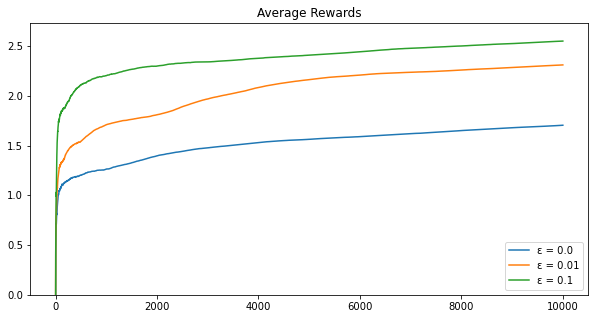

In [10]:
plt.figure(figsize=(10,5))
for i, epsilon in enumerate(epsilons):
    plt.plot(range(timesteps), mean_reward_CSS[i], label=f'ε = {epsilon}')
    
plt.legend()
plt.title('Average Rewards')
plt.ylim([0, None])
plt.show()

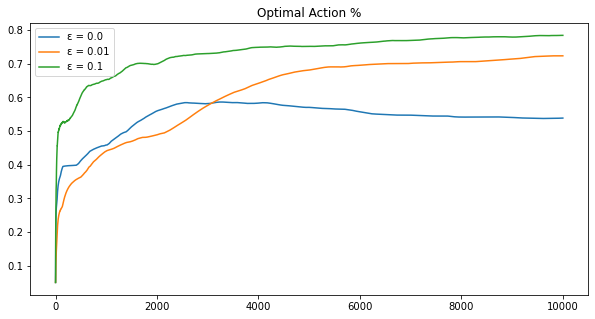

In [11]:
plt.figure(figsize=(10,5))
for i, epsilon in enumerate(epsilons):
    plt.plot(range(timesteps), mean_optimal_pct_CSS[i], label=f'ε = {epsilon}')

plt.legend()
plt.title('Optimal Action %')
plt.show()

## Optimistic Initial Values

Initial action values can also be used as a simple way to encourage exploration. In fact, by setting **Optimistic initial values**, all actions are tried several times before the value estimates converge. The system does a fair amount of exploration even if greedy actions are selected all the time.

In [12]:
# PARAMETERS
n = 10
timesteps = 1000
runs = 100
epsilons = [0.0, 0.01, 0.1]

In [13]:
# Average reward
mean_reward_OIV = np.zeros(shape=(len(epsilons), timesteps))

# Average percentage of optimal actions
mean_optimal_pct_OIV = np.zeros(shape=(len(epsilons), timesteps))

for run in range(runs):
    
    # Rating of each restaurant
    restaurant_mean = random.normal(0, 1, size=n)
    
    for i, epsilon in enumerate(epsilons):
        
        # Initialize expectations with Optimistic Initial Values
        cumulative_rewards = np.zeros(shape=(n,))                               
        cumulative_steps = np.zeros(shape=(n,))
        expectations = np.ones(shape=(n,)) * 5
        
        # Initialize episode scores
        episode_reward = np.zeros(shape=(timesteps,))
        episode_optimal_pct = np.zeros(shape=(timesteps,))
        optimal_actions = 0
        
        for timestep in range(1, timesteps+1):
            
            if random.rand() < epsilon:
                # Exploration
                action = random.randint(n)
            else:
                # Exploitation
                action = np.argmax(expectations)
                
            reward = random.normal(restaurant_mean[action], 1)
            
            # Update optimal action count
            if action in np.argwhere(restaurant_mean == np.max(restaurant_mean)):
                optimal_actions += 1
                
            # Update expectations for the current action
            cumulative_rewards[action] += reward
            cumulative_steps[action] += 1
            expectations[action] = cumulative_rewards[action] / cumulative_steps[action]
            
            # Save episode scores
            episode_reward[timestep-1] = np.sum(cumulative_rewards) / timestep
            episode_optimal_pct[timestep-1] = optimal_actions / timestep
            
        mean_reward_OIV[i] += episode_reward
        mean_optimal_pct_OIV[i] += episode_optimal_pct
        
mean_reward_OIV /= runs
mean_optimal_pct_OIV /= runs

In [14]:
for i, epsilon in enumerate(epsilons):
    print(f'Total Satisfaction with ε = {epsilon} is {round(mean_reward_OIV[i][-1], 2)}')

Total Satisfaction with ε = 0.0 is 1.34
Total Satisfaction with ε = 0.01 is 1.3
Total Satisfaction with ε = 0.1 is 1.25


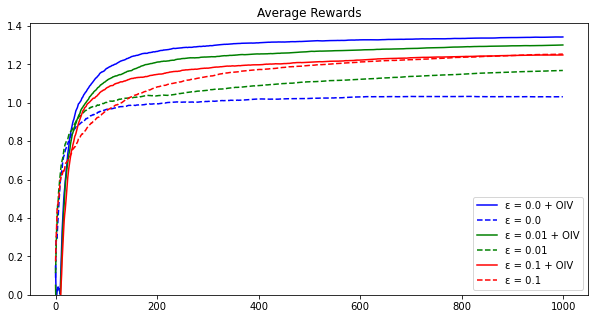

In [15]:
plt.figure(figsize=(10,5))
for i, epsilon in enumerate(epsilons):
    plt.plot(range(timesteps), mean_reward_OIV[i], label=f'ε = {epsilon} + OIV', c=['b', 'g', 'r', 'y', 'k'][i])
    plt.plot(range(timesteps), mean_reward_SA[i], label=f'ε = {epsilon}', linestyle='--', c=['b', 'g', 'r', 'y', 'k'][i])

plt.legend()
plt.title('Average Rewards')
plt.ylim([0, None])
plt.show()

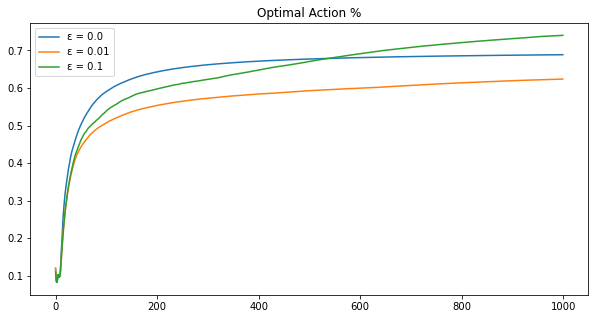

In [16]:
plt.figure(figsize=(10,5))
for i, epsilon in enumerate(epsilons):
    plt.plot(range(timesteps), mean_optimal_pct_OIV[i], label=f'ε = {epsilon}')

plt.legend()
plt.title('Optimal Action %')
plt.show()

## Unbiased Constant step-size trick

It is possible to avoid the bias of constant step sizes while retaining their advantages on nonstationary problems by using a step size equal to:

$\beta_n = \dfrac{\alpha}{\theta_n} \;$ where $\; \theta_n = \theta_{n-1} + \alpha * (1 - \theta_{n-1}) \;$ for $\; n > 0 \;$, with $\; \theta_0 = 0$.

In [17]:
# PARAMETERS
n = 10
timesteps = 10000
runs = 20
alpha = 0.1
epsilons = [0.0, 0.01, 0.1]

In [18]:
# Average reward
mean_reward_UCS = np.zeros(shape=(len(epsilons), timesteps))

# Average percentage of optimal actions
mean_optimal_pct_UCS = np.zeros(shape=(len(epsilons), timesteps))

for run in range(runs):
    
    # Rating of each restaurant
    restaurant_mean = random.normal(0, 1, size=n)
    
    for i, epsilon in enumerate(epsilons):
        
        # Initialize expectations 
        expectations = np.zeros(shape=(n,))
        
        # Initialize episode scores
        episode_reward = np.zeros(shape=(timesteps,))
        episode_optimal_pct = np.zeros(shape=(timesteps,))
        
        total_reward = 0
        optimal_actions = 0
        theta = 0
        
        for timestep in range(1, timesteps+1):
            
            # Random-walk of true values
            restaurant_mean += random.normal(0, 0.01, size=n)
            
            if random.rand() < epsilon:
                # Exploration
                action = random.randint(n)
            else:
                # Exploitation
                action = np.argmax(expectations)
                
            reward = random.normal(restaurant_mean[action], 1)
            
            # Update total reward, optimal action count
            total_reward += reward
            
            if action in np.argwhere(restaurant_mean == np.max(restaurant_mean)):
                optimal_actions += 1
                
            # Update expectations for the current action
            if timestep == 1:
                expectations[action] += alpha * (reward - expectations[action])
            else:
                expectations[action] += (alpha / theta) * (reward - expectations[action])
            
            # Update theta
            theta = theta + alpha * (1 - theta)
            
            # Save episode scores
            episode_reward[timestep-1] = total_reward / timestep
            episode_optimal_pct[timestep-1] = optimal_actions / timestep
            
        mean_reward_UCS[i] += episode_reward
        mean_optimal_pct_UCS[i] += episode_optimal_pct
        
mean_reward_UCS /= runs
mean_optimal_pct_UCS /= runs

In [19]:
for i, epsilon in enumerate(epsilons):
    print(f'Total Satisfaction with ε = {epsilon} is {round(mean_reward_UCS[i][-1], 2)}')

Total Satisfaction with ε = 0.0 is 1.64
Total Satisfaction with ε = 0.01 is 2.43
Total Satisfaction with ε = 0.1 is 2.9


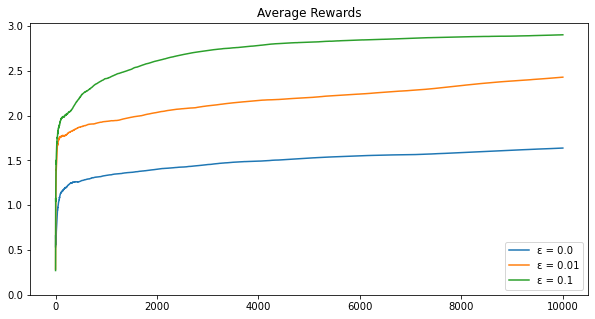

In [20]:
plt.figure(figsize=(10,5))
for i, epsilon in enumerate(epsilons):
    plt.plot(range(timesteps), mean_reward_UCS[i], label=f'ε = {epsilon}')
    
plt.legend()
plt.title('Average Rewards')
plt.ylim([0, None])
plt.show()

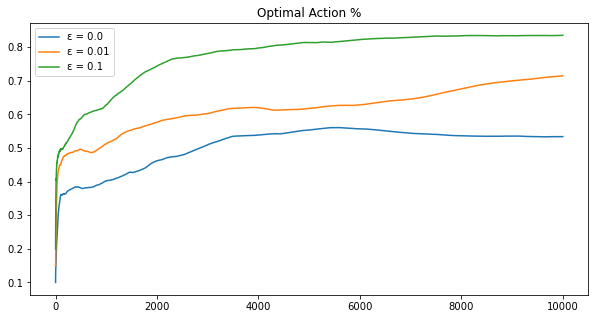

In [21]:
plt.figure(figsize=(10,5))
for i, epsilon in enumerate(epsilons):
    plt.plot(range(timesteps), mean_optimal_pct_UCS[i], label=f'ε = {epsilon}')

plt.legend()
plt.title('Optimal Action %')
plt.show()

## Upper-Confidence-Bound Action Selection

The idea of this **upper confidence bound (UCB)** action selection is that the square-root term is a measure of the uncertainty or variance in the estimate of a’s value. The maximized quantity is therefore a kind of upper limit to the possible true value of the action. The uncertainty of an action-value is reduced every time the action is selected.

In [59]:
# PARAMETERS
n = 10
timesteps = 1000
runs = 100
c = 1
epsilons = [0.0, 0.01, 0.1]

In [60]:
# Average reward
mean_reward_UCB = np.zeros(shape=(timesteps,))

# Average percentage of optimal actions
mean_optimal_pct_UCB = np.zeros(shape=(timesteps,))

for run in range(runs):
    
    # Rating of each restaurant
    restaurant_mean = random.normal(0, 1, size=n)
    
    # Initialize expectations
    cumulative_rewards = np.zeros(shape=(n,))                               
    cumulative_steps = np.zeros(shape=(n,))
    expectations = np.zeros(shape=(n,))
    
    # Initialize episode scores
    episode_reward = np.zeros(shape=(timesteps,))
    episode_optimal_pct = np.zeros(shape=(timesteps,))
    
    optimal_actions = 0
        
    for timestep in range(1, timesteps+1):
          
        # UCB action selection
        if np.any(expectations == 0):
            action = np.argmin(cumulative_steps)
        else:
            action = np.argmax(expectations + c * np.sqrt(np.log(timestep) / cumulative_steps))
                
        reward = random.normal(restaurant_mean[action], 1)
            
        # Update optimal action count
        if action in np.argwhere(restaurant_mean == np.max(restaurant_mean)):
            optimal_actions += 1
            
        # Update expectations for the current action
        cumulative_rewards[action] += reward
        cumulative_steps[action] += 1
        expectations[action] = cumulative_rewards[action] / cumulative_steps[action]
            
        # Save episode scores  
        episode_reward[timestep-1] = np.sum(cumulative_rewards) / timestep
        episode_optimal_pct[timestep-1] = optimal_actions / timestep
            
    mean_reward_UCB += episode_reward
    mean_optimal_pct_UCB += episode_optimal_pct
 
# Average score evaluation
mean_reward_UCB /= runs
mean_optimal_pct_UCB /= runs

In [61]:
print(f'Total Satisfaction with UCB is {round(mean_reward_UCB[-1], 2)}')

Total Satisfaction with UCB is 1.49


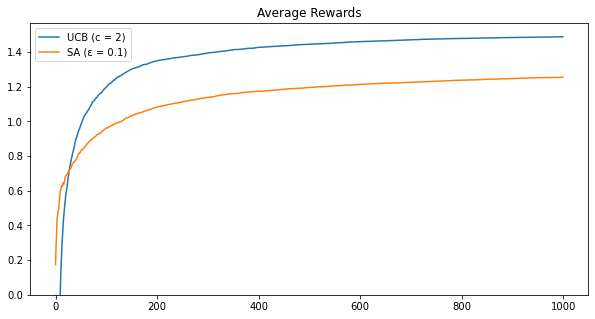

In [62]:
plt.figure(figsize=(10,5))
plt.plot(range(timesteps), mean_reward_UCB, label=f'UCB (c = 2)')
plt.plot(range(timesteps), mean_reward_SA[2], label=f'SA (ε = 0.1)')
    
plt.legend()
plt.title('Average Rewards')
plt.ylim([0, None])
plt.show()

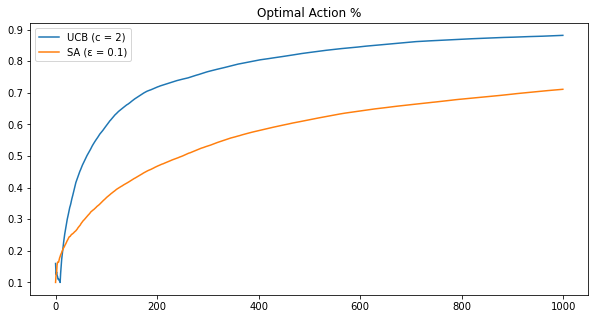

In [63]:
plt.figure(figsize=(10,5))
plt.plot(range(timesteps), mean_optimal_pct_UCB, label=f'UCB (c = 2)')
plt.plot(range(timesteps), mean_optimal_pct_SA[2], label=f'SA (ε = 0.1)')

plt.legend()
plt.title('Optimal Action %')
plt.show()

## Gradient Bandit algorithm

In [38]:
# PARAMETERS
n = 10
timesteps = 1000
runs = 100
alphas = [0.1, 0.4]

In [48]:
# Average reward
mean_reward_GB = np.zeros(shape=(len(alphas), timesteps))

# Average percentage of optimal actions
mean_optimal_pct_GB = np.zeros(shape=(len(alphas), timesteps))

for run in range(runs):
    
    # Rating of each restaurant
    restaurant_mean = random.normal(4, 1, size=n)
    
    for i, alpha in enumerate(alphas):
        
        # Initialize probabilities
        action_preferences = np.zeros(shape=(n,))

        # Initialize episode scores
        episode_reward = np.zeros(shape=(timesteps,))
        episode_optimal_pct = np.zeros(shape=(timesteps,))

        total_reward = 0
        optimal_actions = 0

        for timestep in range(1, timesteps+1):

            action_prob = np.exp(action_preferences) / np.sum(np.exp(action_preferences)) 
            action = np.random.choice(list(range(n)), p=action_prob)
            reward = random.normal(restaurant_mean[action], 1)

            # Update expectations for the current action
            action_preferences[action] += alpha * (reward - (total_reward / timestep)) * (1 - action_prob[action])

            for a in list(range(n)):
                if a != action:
                    action_preferences[a] -= alpha * (reward - (total_reward / timestep)) * action_prob[a]

            # Update total reward and optimal action count
            if action in np.argwhere(restaurant_mean == np.max(restaurant_mean)):
                optimal_actions += 1

            total_reward += reward

            # Save episode scores  
            episode_reward[timestep-1] = total_reward / timestep
            episode_optimal_pct[timestep-1] = optimal_actions / timestep
            
        mean_reward_GB[i] += episode_reward
        mean_optimal_pct_GB[i] += episode_optimal_pct
 
# Average score evaluation
mean_reward_GB /= runs
mean_optimal_pct_GB /= runs

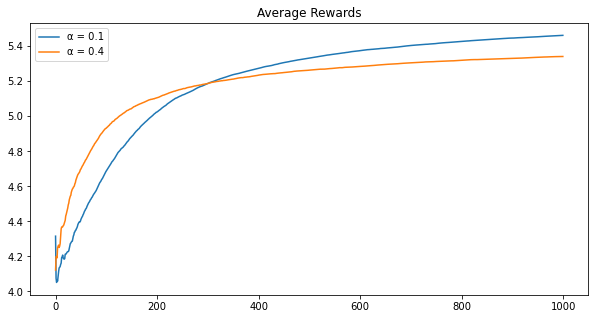

In [51]:
plt.figure(figsize=(10,5))
for i, alpha in enumerate(alphas):
    plt.plot(range(timesteps), mean_reward_GB[i], label=f'α = {alphas[i]}')
    
plt.legend()
plt.title('Average Rewards')
plt.show()

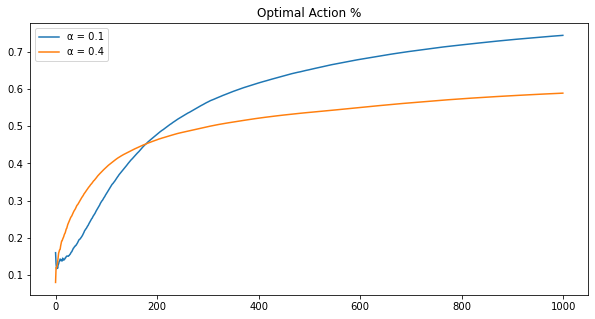

In [50]:
plt.figure(figsize=(10,5))
for i, alpha in enumerate(alphas):
    plt.plot(range(timesteps), mean_optimal_pct_GB[i], label=f'α = {alphas[i]}')
    
plt.legend()
plt.title('Optimal Action %')
plt.show()